In [12]:
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

# Define number of samples
n_samples = 5000

# Generate synthetic data
data = {
    'lead_id': [f"MLO_{i:08d}" for i in range(n_samples)],
    'age': np.random.randint(22, 60, n_samples),
    'location': np.random.choice(['North America', 'Europe', 'Asia', 'South America'], n_samples),
    'industry': np.random.choice(['IT', 'Healthcare', 'Manufacturing', 'Retail', 'Finance'], n_samples),
    'job_role': np.random.choice(['Manager', 'Executive', 'Student', 'Freelancer', 'Other'], n_samples),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], n_samples, p=[0.4, 0.4, 0.2]),
    'website_visits': np.random.poisson(5, n_samples),
    'email_opens': np.random.poisson(3, n_samples),
    'time_spent_on_site': np.random.uniform(1.0, 30.0, n_samples).round(2),
    'click_through_rate': np.clip(np.random.normal(0.25, 0.1, n_samples), 0, 1).round(2),
    'past_purchases': np.random.poisson(1, n_samples),
    'inquiry_responses': np.random.randint(0, 5, n_samples),
    'lead_source': np.random.choice(['Paid Ads', 'Referral', 'Organic', 'Social Media', 'Other'], n_samples),
    'lead_quality': np.random.choice(['High', 'Medium', 'Low'], n_samples, p=[0.3, 0.5, 0.2]),
}

# Generate lead_score (target variable) with a formula and some noise
lead_score = (
    2 * data['website_visits'] +
    3 * data['email_opens'] +
    4 * data['past_purchases'] +
    4 * data['inquiry_responses'] +
    (data['click_through_rate'] * 20) +
    np.random.normal(0, 5, n_samples)  # Gaussian noise
)

# Normalize lead_score between 0–100
lead_score = (lead_score - lead_score.min()) / (lead_score.max() - lead_score.min()) * 100
data['lead_score'] = lead_score.round(2)

# Create DataFrame
df_full_synthetic = pd.DataFrame(data)
df_full_synthetic.head()



,lead_id,age,location,industry,job_role,company_size,website_visits,email_opens,time_spent_on_site,click_through_rate,past_purchases,inquiry_responses,lead_source,lead_quality,lead_score
0,MLO_00000000,50,Asia,Manufacturing,Freelancer,Large,3,2,16.41,0.28,2,1,Other,High,31.08
1,MLO_00000001,36,South America,IT,Manager,Large,3,4,9.17,0.07,1,4,Paid Ads,High,55.66
2,MLO_00000002,29,North America,Retail,Other,Small,6,8,6.81,0.21,1,4,Other,Medium,79.43
3,MLO_00000003,42,Asia,Manufacturing,Manager,Small,9,4,20.04,0.27,1,3,Social Media,Medium,51.16
4,MLO_00000004,40,Europe,IT,Executive,Medium,6,2,27.73,0.20,0,1,Other,High,38.57


In [13]:
df_full_synthetic.to_csv("lead_scoring_dataset.csv", index=False)

In [1]:
import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv("D:\\GenAI\\Customer_Sales_Enquiry_GenAI\\Data\\lead_scoring_dataset1.csv")

In [3]:
df.sample(5)

,lead_id,age,location,industry,job_role,company_size,website_visits,email_opens,time_spent_on_site,click_through_rate,past_purchases,inquiry_responses,lead_source,lead_quality,lead_score
732,MLO_00000732,24,North America,IT,Freelancer,Small,6,4,18.68,0.40,2,0,Other,Low,47.08
996,MLO_00000996,51,South America,Manufacturing,Manager,Large,4,6,25.76,0.19,1,3,Other,Low,57.63
1129,MLO_00001129,23,Europe,Healthcare,Student,Small,4,1,16.89,0.35,1,0,Organic,High,30.02
439,MLO_00000439,31,Europe,Healthcare,Manager,Large,6,4,9.65,0.39,1,2,Referral,High,43.81
1391,MLO_00001391,57,Asia,IT,Manager,Large,4,2,10.14,0.27,0,0,Paid Ads,Medium,42.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lead_id             5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   location            5000 non-null   object 
 3   industry            5000 non-null   object 
 4   job_role            5000 non-null   object 
 5   company_size        5000 non-null   object 
 6   website_visits      5000 non-null   int64  
 7   email_opens         5000 non-null   int64  
 8   time_spent_on_site  5000 non-null   float64
 9   click_through_rate  5000 non-null   float64
 10  past_purchases      5000 non-null   int64  
 11  inquiry_responses   5000 non-null   int64  
 12  lead_source         5000 non-null   object 
 13  lead_quality        5000 non-null   object 
 14  lead_score          5000 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 586.1+

In [5]:
df.drop(columns=['lead_id'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   location            5000 non-null   object 
 2   industry            5000 non-null   object 
 3   job_role            5000 non-null   object 
 4   company_size        5000 non-null   object 
 5   website_visits      5000 non-null   int64  
 6   email_opens         5000 non-null   int64  
 7   time_spent_on_site  5000 non-null   float64
 8   click_through_rate  5000 non-null   float64
 9   past_purchases      5000 non-null   int64  
 10  inquiry_responses   5000 non-null   int64  
 11  lead_source         5000 non-null   object 
 12  lead_quality        5000 non-null   object 
 13  lead_score          5000 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 547.0+ KB


In [7]:
df.shape

(5000, 14)

In [8]:
df.isnull().sum()


age                   0
location              0
industry              0
job_role              0
company_size          0
website_visits        0
email_opens           0
time_spent_on_site    0
click_through_rate    0
past_purchases        0
inquiry_responses     0
lead_source           0
lead_quality          0
lead_score            0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [9]:
df.dtypes

age                     int64
location               object
industry               object
job_role               object
company_size           object
website_visits          int64
email_opens             int64
time_spent_on_site    float64
click_through_rate    float64
past_purchases          int64
inquiry_responses       int64
lead_source            object
lead_quality           object
lead_score            float64
dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

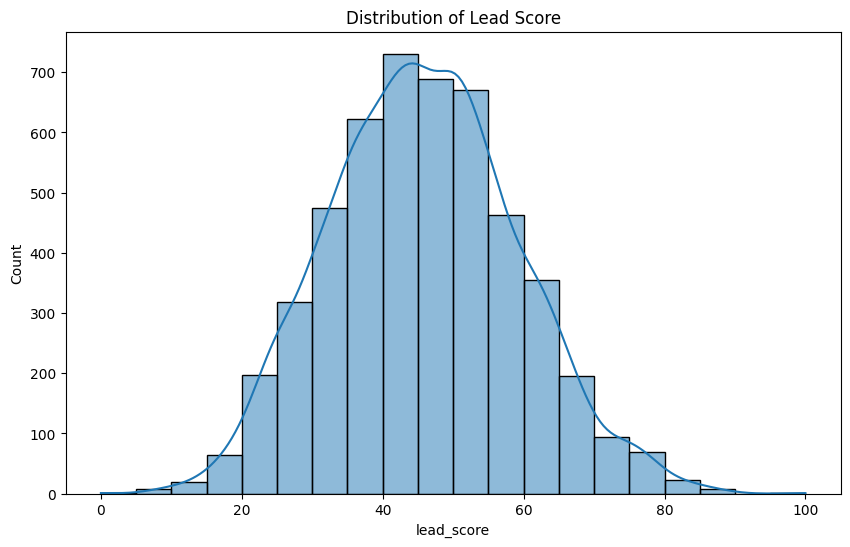

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df["lead_score"], bins=20, kde=True)
plt.title("Distribution of Lead Score")
plt.show()


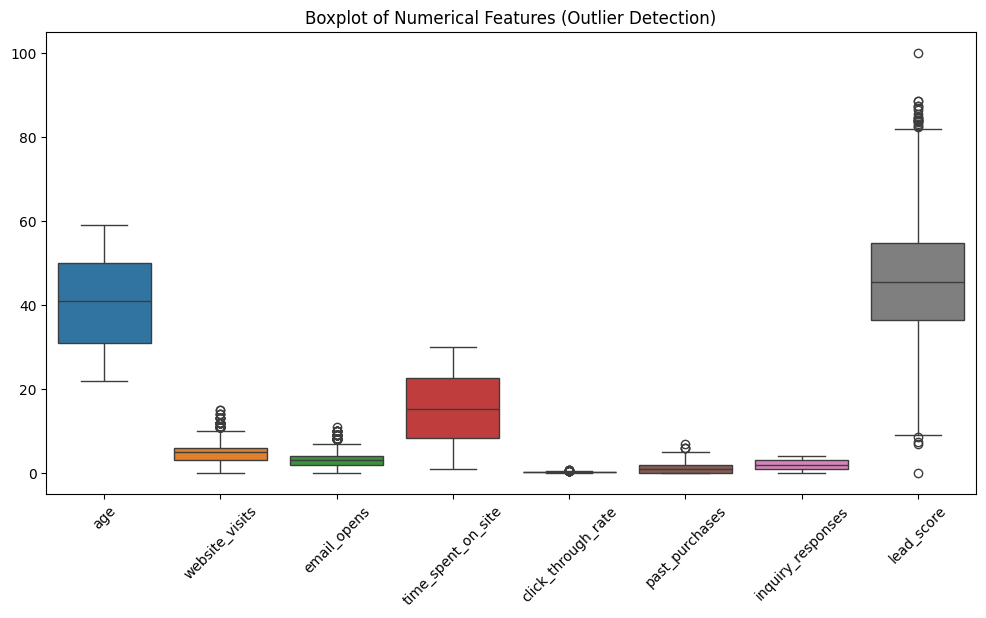

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number'],))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

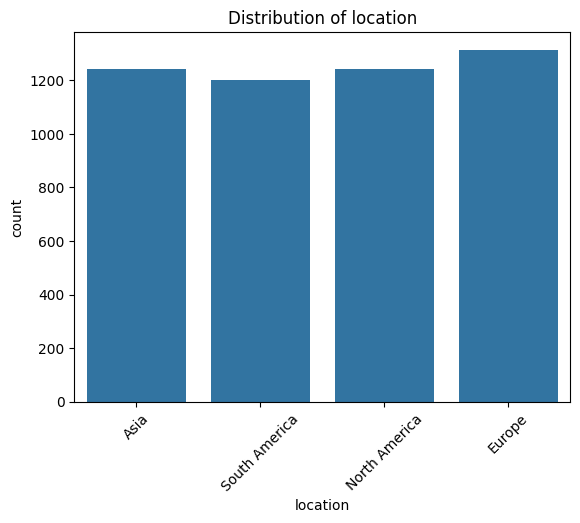

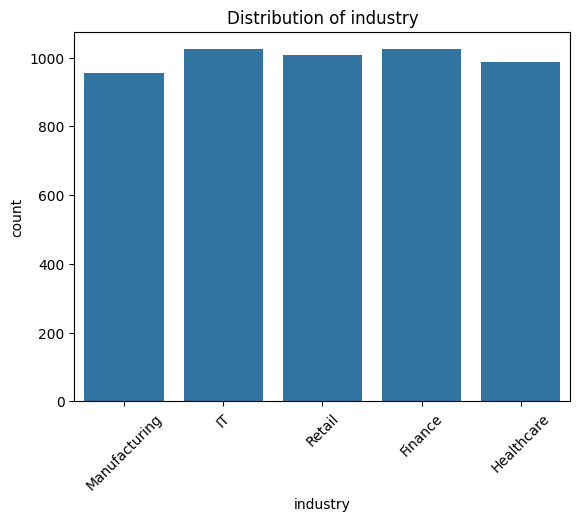

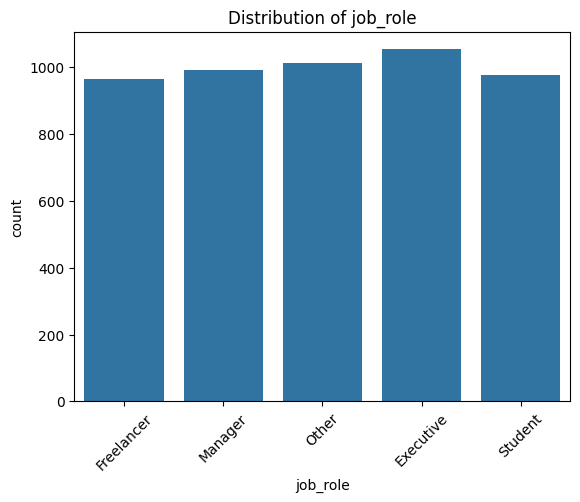

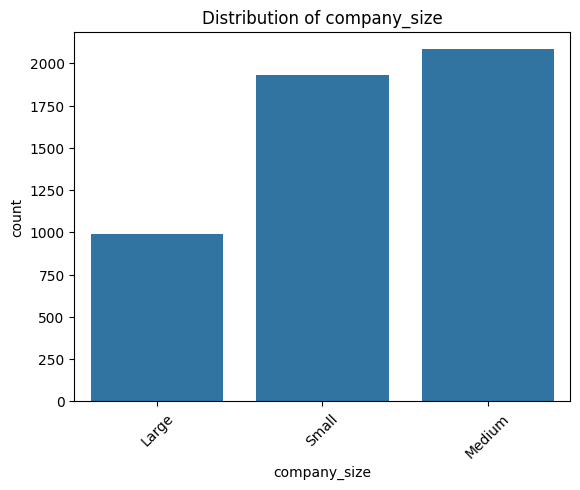

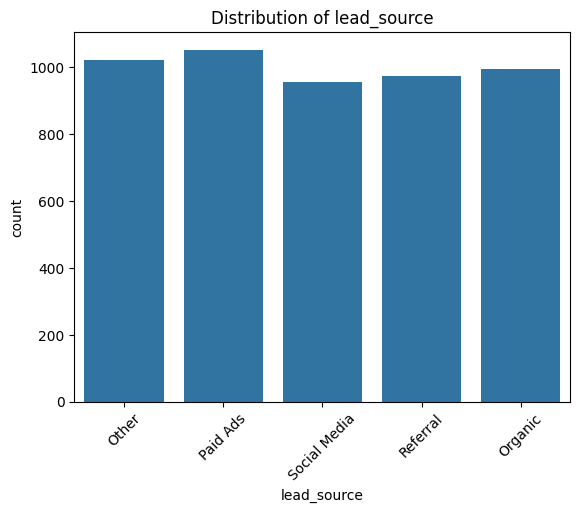

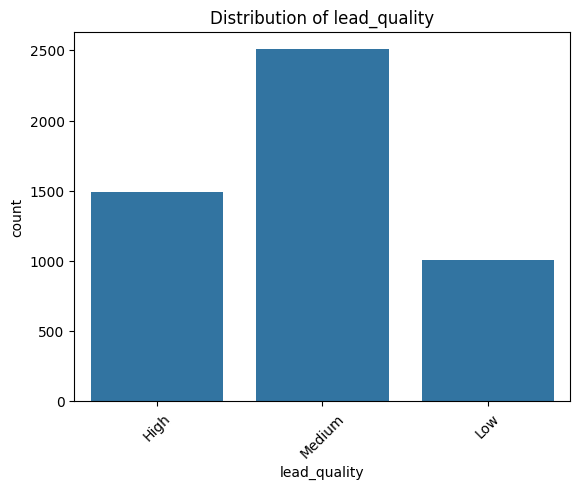

In [27]:
categorical_cols = ['location', 'industry', 'job_role', 'company_size', 'lead_source', 'lead_quality']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


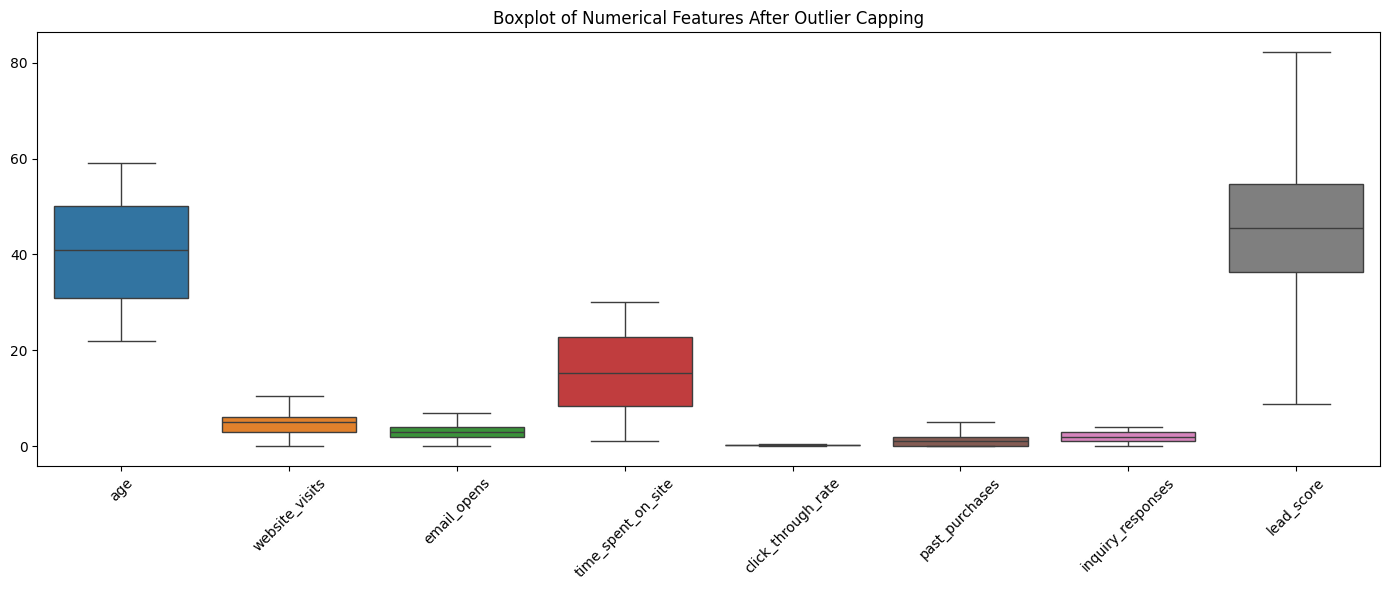

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower, lower,
                            np.where(data[column] > upper, upper, data[column]))
    return data


numerical_cols = ['age', 'website_visits', 'email_opens', 'time_spent_on_site',
                  'click_through_rate', 'past_purchases', 'inquiry_responses', 'lead_score']
for col in numerical_cols:
    df = cap_outliers(df, col)


plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features After Outlier Capping")
plt.tight_layout()
plt.show()


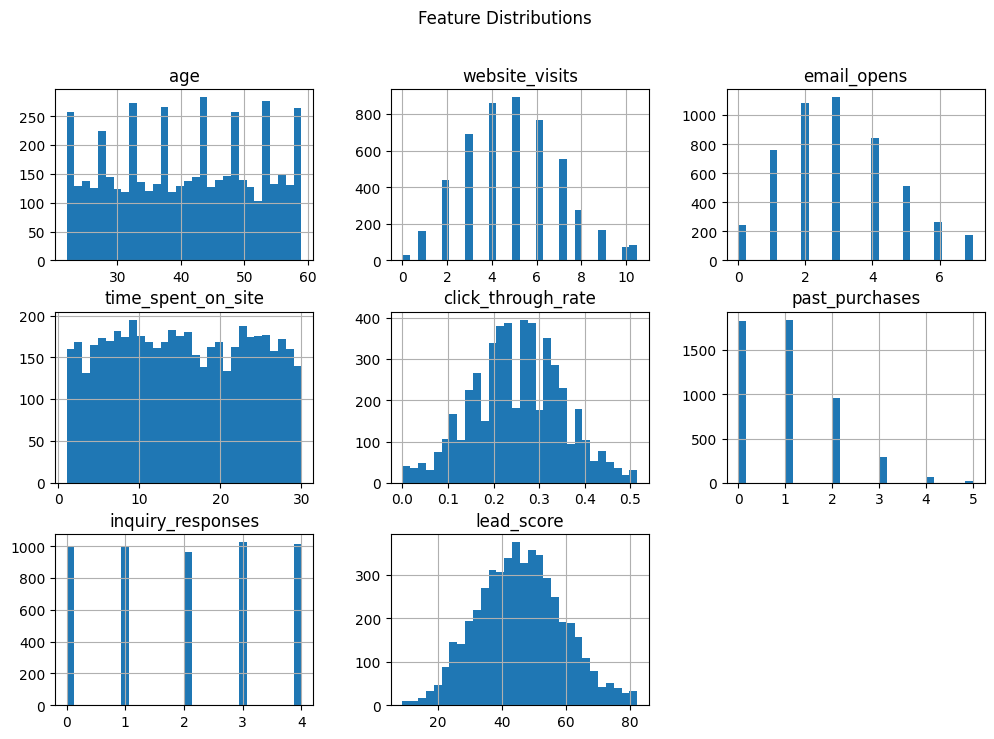

In [29]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [30]:
df.columns

Index(['age', 'location', 'industry', 'job_role', 'company_size',
       'website_visits', 'email_opens', 'time_spent_on_site',
       'click_through_rate', 'past_purchases', 'inquiry_responses',
       'lead_source', 'lead_quality', 'lead_score'],
      dtype='object')

In [31]:
df.sample(5)

,age,location,industry,job_role,company_size,website_visits,email_opens,time_spent_on_site,click_through_rate,past_purchases,inquiry_responses,lead_source,lead_quality,lead_score
89,29.0,Europe,Finance,Other,Medium,5.0,3.0,25.46,0.14,0.0,1.0,Organic,Low,29.53
238,39.0,South America,Retail,Student,Medium,3.0,4.0,16.52,0.20,2.0,3.0,Social Media,Low,53.05
529,34.0,North America,IT,Student,Small,7.0,5.0,28.01,0.16,0.0,0.0,Social Media,Medium,35.30
2287,25.0,Asia,Retail,Student,Medium,6.0,3.0,23.50,0.12,0.0,1.0,Other,Low,26.03
3996,54.0,Asia,Healthcare,Executive,Large,3.0,2.0,8.61,0.19,2.0,0.0,Organic,High,30.91


In [12]:
X = df.drop(['lead_score'], axis=1)
y = df['lead_score'] 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_original = X_train.copy()

In [15]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Your feature definitions
nominal_features = ['location', 'industry', 'job_role', 'lead_source']
ordinal_features = ['lead_quality', 'company_size']
ordinal_categories = [['Low', 'Medium', 'High'], ['Small', 'Medium', 'Large']]
numerical_features = ['age', 'website_visits', 'email_opens', 'time_spent_on_site',
                      'click_through_rate', 'past_purchases', 'inquiry_responses']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features),
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features)
    ]
)


In [16]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [17]:

encoded_nominal = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
final_columns = numerical_features + list(encoded_nominal) + ordinal_features
X_processed = pd.DataFrame(X_train_transformed, columns=final_columns)



In [18]:
print(X_train[numerical_features].head())
print(X_processed[numerical_features].head())

       age  website_visits  email_opens  time_spent_on_site  \
4227  34.0             6.0          3.0               23.23   
4676  38.0             6.0          2.0               13.00   
800   47.0             5.0          4.0                6.38   
3671  51.0             4.0          4.0               18.75   
4193  52.0             4.0          7.0               25.81   

      click_through_rate  past_purchases  inquiry_responses  
4227                0.28             2.0                4.0  
4676                0.11             1.0                0.0  
800                 0.39             1.0                1.0  
3671                0.29             1.0                1.0  
4193                0.28             1.0                3.0  
        age  website_visits  email_opens  time_spent_on_site  \
0 -0.612389        0.469618     0.001336            0.950207   
1 -0.246524        0.469618    -0.592604           -0.283572   
2  0.576672        0.008474     0.595277           -1.081

In [19]:
print("Original Data (Before Encoding/Scaling):")
display(X_original.head(10))

print("Processed Data (After Encoding/Scaling):")
display(X_processed.head(10))


Original Data (Before Encoding/Scaling):


,age,location,industry,job_role,company_size,website_visits,email_opens,time_spent_on_site,click_through_rate,past_purchases,inquiry_responses,lead_source,lead_quality
4227,34.0,Europe,IT,Student,Small,6.0,3.0,23.23,0.28,2.0,4.0,Other,Medium
4676,38.0,South America,IT,Freelancer,Small,6.0,2.0,13.00,0.11,1.0,0.0,Paid Ads,High
800,47.0,South America,Finance,Executive,Large,5.0,4.0,6.38,0.39,1.0,1.0,Social Media,High
3671,51.0,Asia,Manufacturing,Freelancer,Medium,4.0,4.0,18.75,0.29,1.0,1.0,Social Media,Medium
4193,52.0,Europe,Healthcare,Executive,Large,4.0,7.0,25.81,0.28,1.0,3.0,Social Media,Medium
2968,40.0,Asia,Retail,Other,Large,6.0,3.0,28.33,0.37,1.0,0.0,Paid Ads,High
4793,24.0,North America,Retail,Executive,Small,5.0,3.0,2.82,0.15,0.0,0.0,Other,Medium
4368,40.0,Europe,Retail,Student,Medium,8.0,4.0,24.78,0.19,1.0,3.0,Other,Low
2776,40.0,Asia,IT,Student,Small,5.0,2.0,22.80,0.37,0.0,0.0,Social Media,Medium
2970,24.0,South America,Manufacturing,Executive,Large,10.0,3.0,7.56,0.12,0.0,1.0,Other,High


Processed Data (After Encoding/Scaling):


,age,website_visits,email_opens,time_spent_on_site,click_through_rate,past_purchases,inquiry_responses,location_Asia,location_Europe,location_North America,...,job_role_Manager,job_role_Other,job_role_Student,lead_source_Organic,lead_source_Other,lead_source_Paid Ads,lead_source_Referral,lead_source_Social Media,lead_quality,company_size
0,-0.612389,0.469618,0.001336,0.950207,0.278025,1.021844,1.399931,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.246524,0.469618,-0.592604,-0.283572,-1.454138,0.006347,-1.415062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2,0.576672,0.008474,0.595277,-1.081971,1.398836,0.006347,-0.711314,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3,0.942537,-0.452671,0.595277,0.409901,0.379917,0.006347,-0.711314,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.034003,-0.452671,2.377099,1.261366,0.278025,0.006347,0.696183,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
5,-0.063592,0.469618,0.001336,1.565288,1.195052,0.006347,-1.415062,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
6,-1.527052,0.008474,0.001336,-1.511321,-1.046570,-1.009151,-1.415062,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,-0.063592,1.391906,0.595277,1.137144,-0.639002,0.006347,0.696183,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,-0.063592,0.008474,-0.592604,0.898348,1.195052,-1.009151,-1.415062,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,-1.527052,2.314195,0.001336,-0.939658,-1.352246,-1.009151,-0.711314,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0


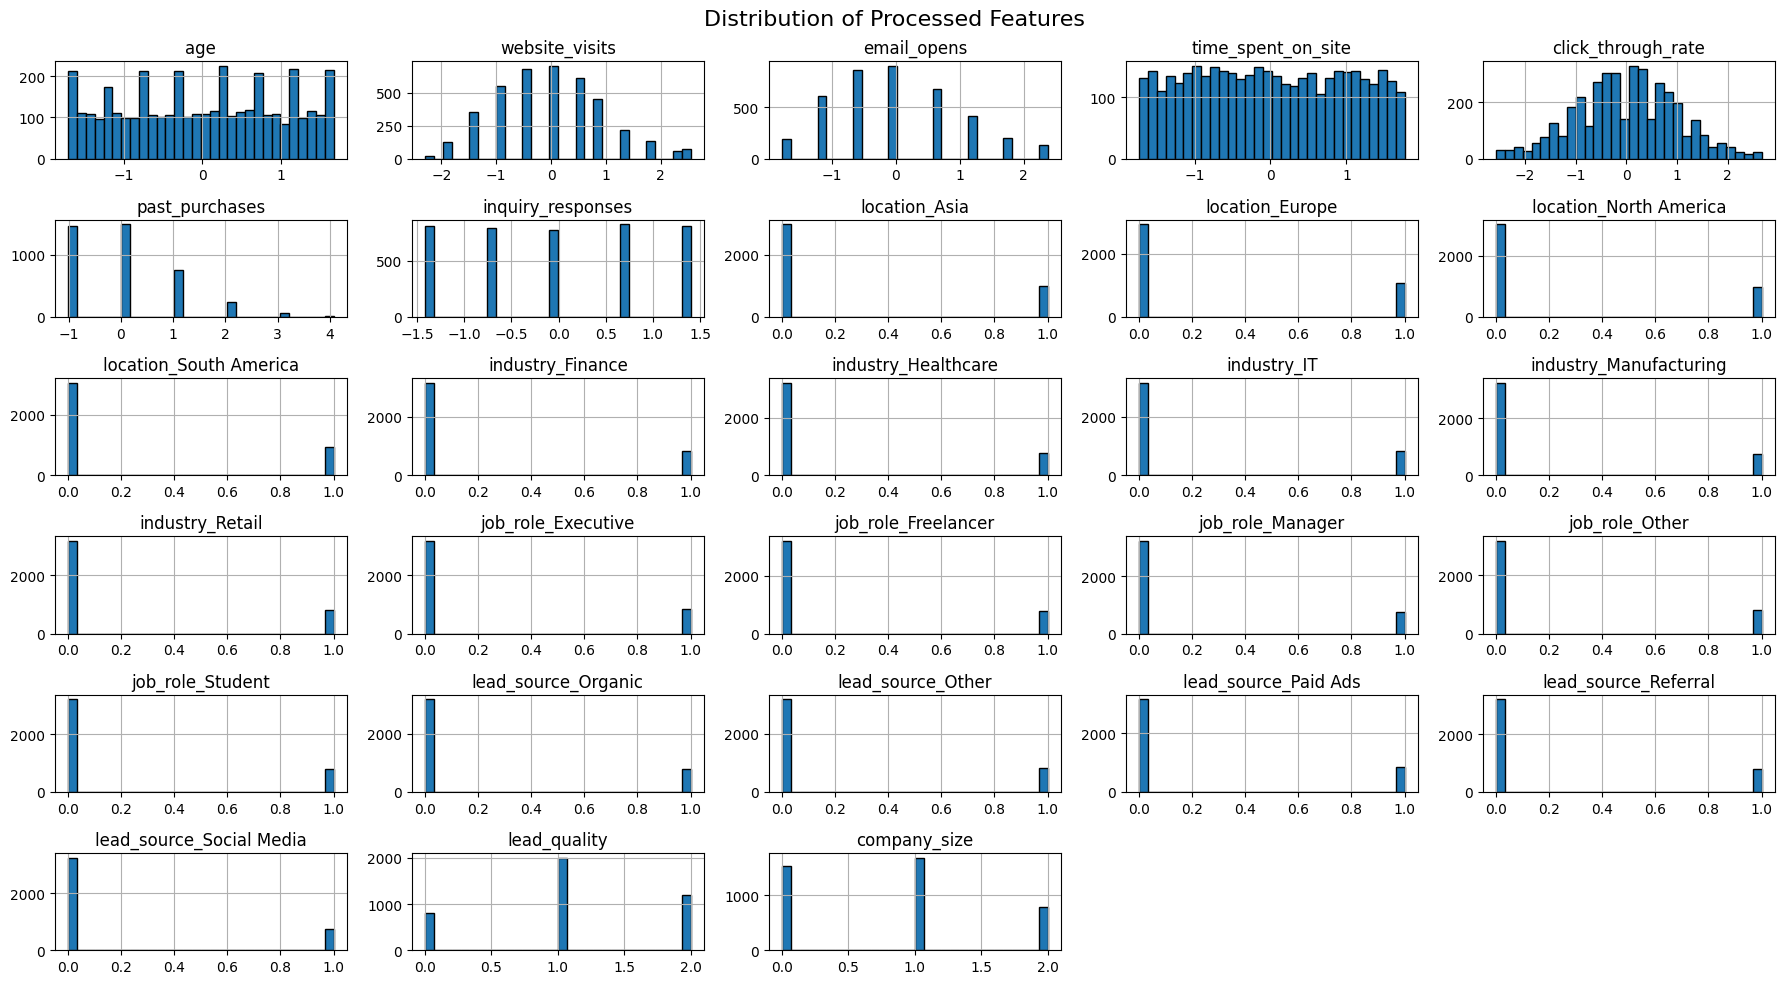

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

X_processed.hist(bins=30, figsize=(18, 10), edgecolor='black')
plt.suptitle("Distribution of Processed Features", fontsize=16)
plt.tight_layout()
plt.show()


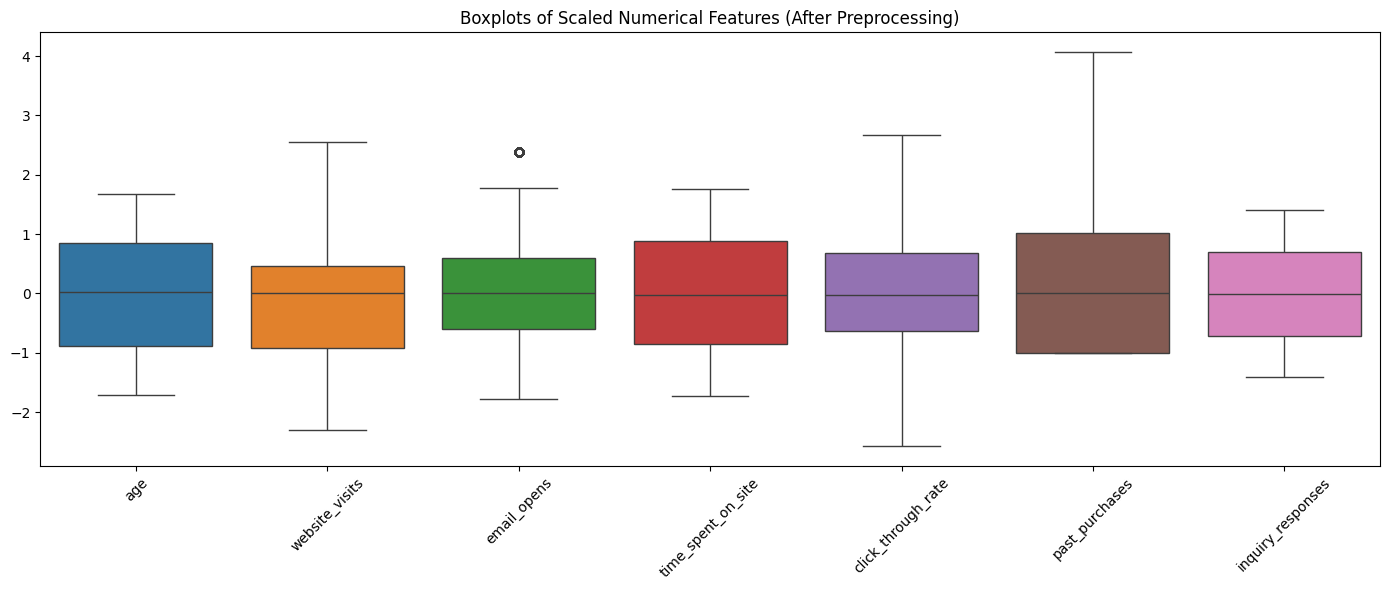

In [41]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=X_processed[numerical_features])
plt.title("Boxplots of Scaled Numerical Features (After Preprocessing)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
!pip install xgboost


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [21]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, verbosity=0)
}


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_raw(model, name):
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"🔍 {name} Results:")
    print(f"  - MAE:  {mae:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - R²:   {r2:.4f}")
    print("-" * 40)

    # 🖼️ Visualization: Actual vs Predicted
    plt.figure(figsize=(14, 5))

    # Plot 1: Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # Plot 2: Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.hist(residuals, bins=30, color='lightcoral', edgecolor='black')
    plt.title(f'{name} - Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    


🔍 Random Forest Results:
  - MAE:  5.43
  - RMSE: 6.79
  - R²:   0.7316
----------------------------------------


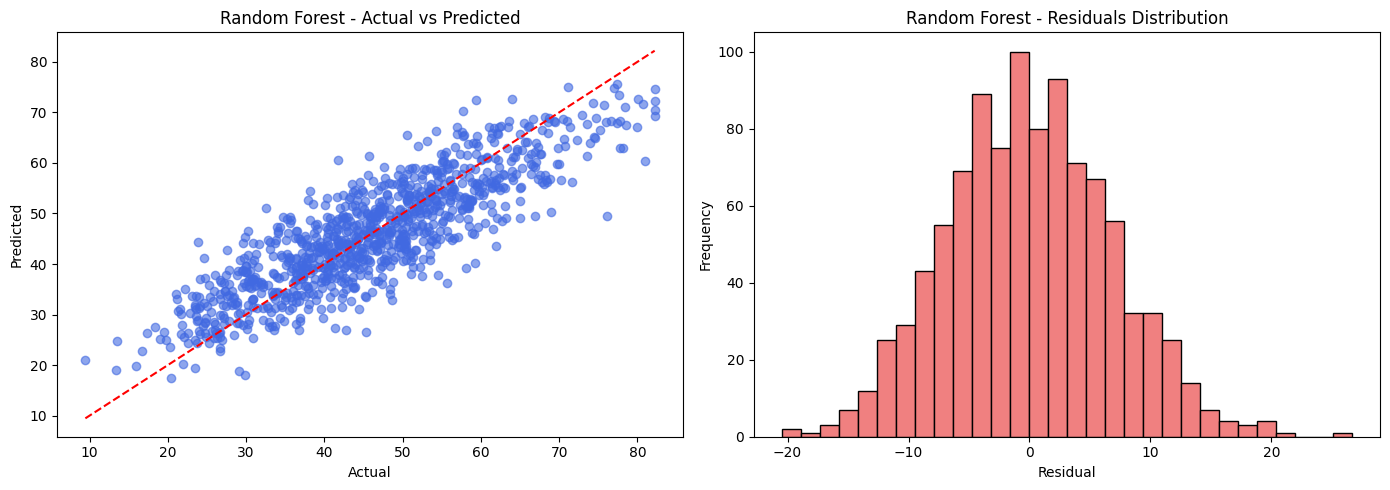

🔍 Decision Tree Results:
  - MAE:  7.96
  - RMSE: 9.89
  - R²:   0.4302
----------------------------------------


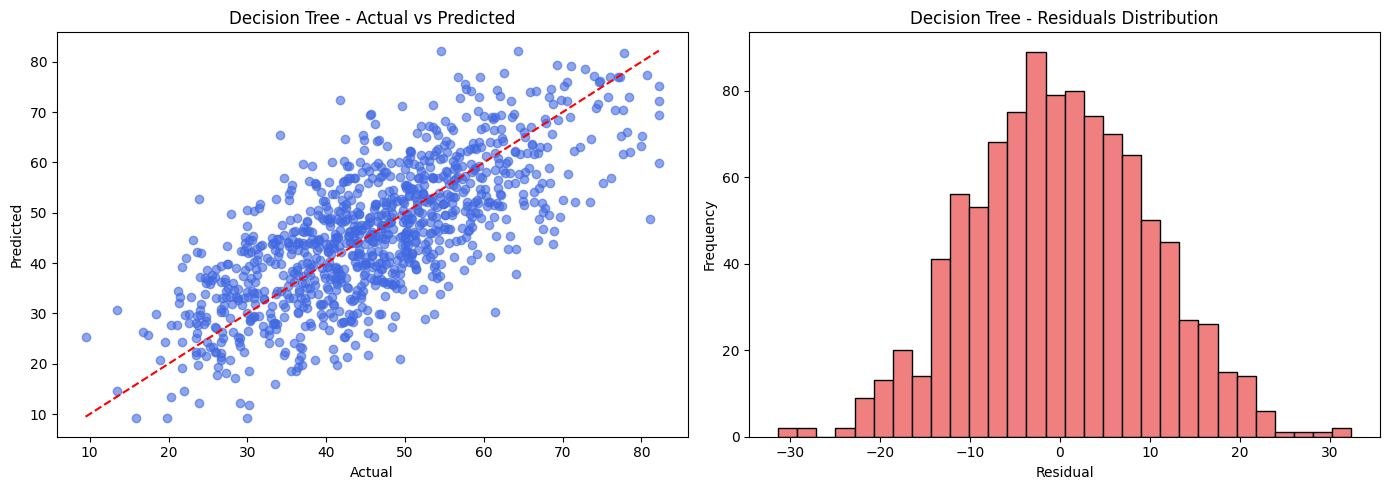

🔍 XGBoost Regressor Results:
  - MAE:  5.36
  - RMSE: 6.75
  - R²:   0.7342
----------------------------------------


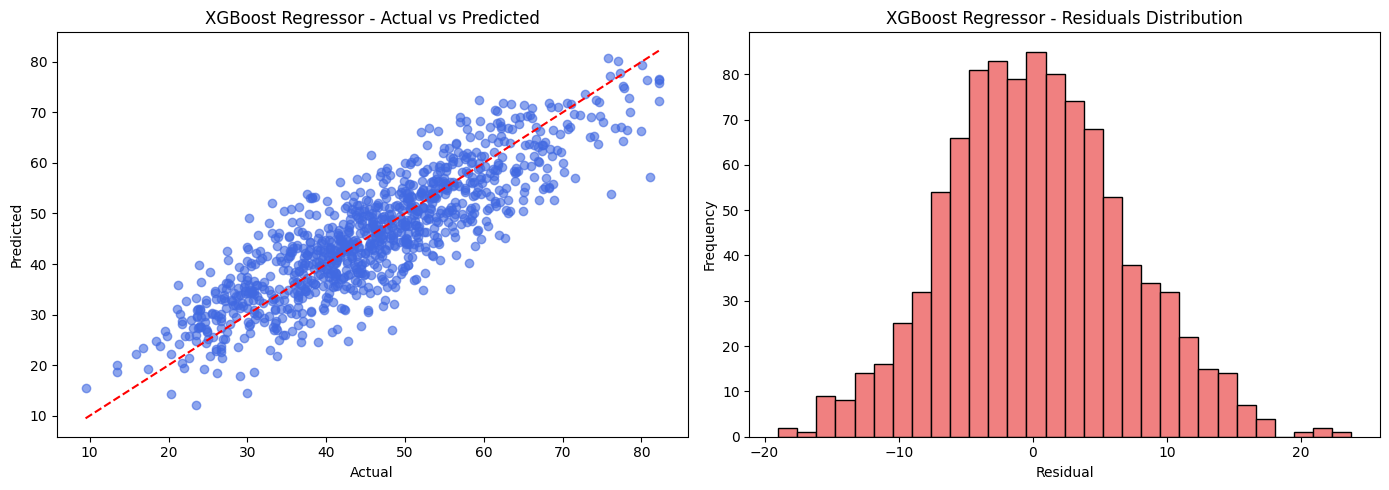

In [23]:
for name, model in models.items():
    evaluate_model_raw(model, name)


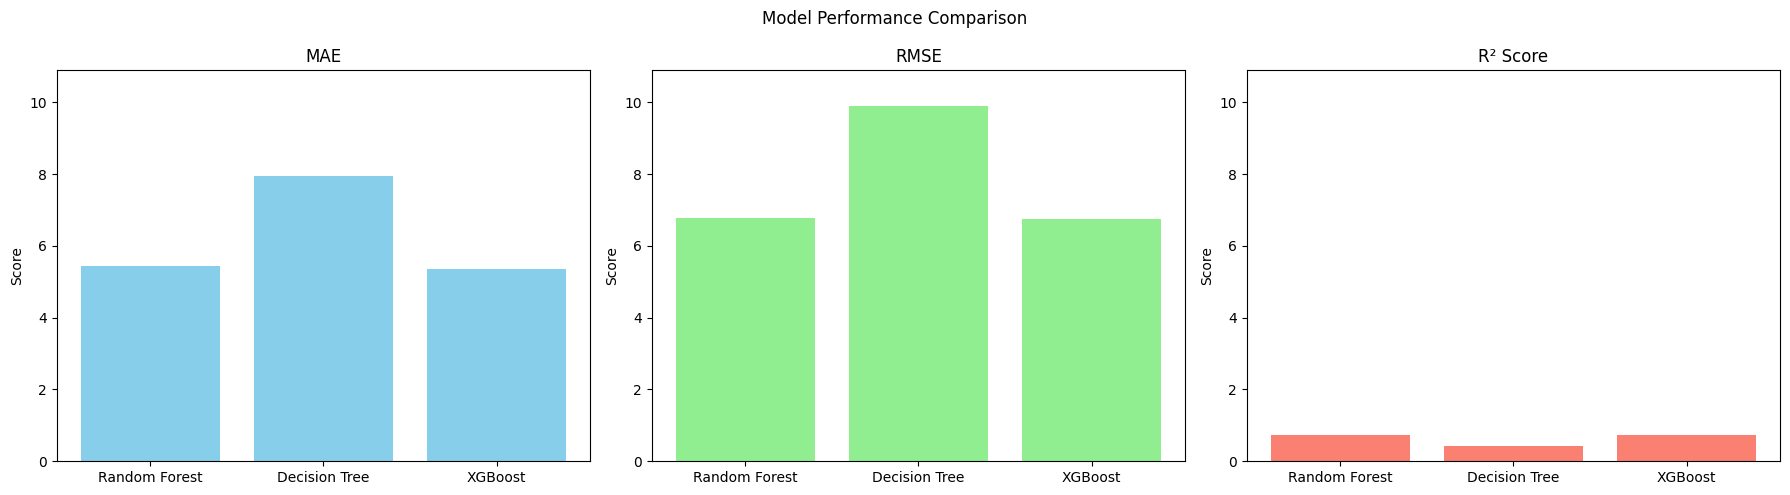

In [24]:
import matplotlib.pyplot as plt

# Your scores (example values)
models = ['Random Forest', 'Decision Tree', 'XGBoost']
mae = [5.43, 7.96, 5.36]
rmse = [6.78, 9.89, 6.75]
r2 = [0.7319, 0.4302, 0.7342]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].bar(models, mae, color='skyblue')
axs[0].set_title("MAE")
axs[1].bar(models, rmse, color='lightgreen')
axs[1].set_title("RMSE")
axs[2].bar(models, r2, color='salmon')
axs[2].set_title("R² Score")

for ax in axs:
    ax.set_ylabel("Score")
    ax.set_ylim(0, max(max(mae), max(rmse), 1.0) + 1)

plt.suptitle("Model Performance Comparison")
plt.tight_layout()
plt.show()


In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Grid of parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit on the preprocessed training set
grid_search.fit(X_train_transformed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R² Score: 0.7811362244954779


In [27]:
best_model= XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, verbosity=0)
best_model.fit(X_train_transformed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred = best_model.predict(X_test_transformed)

In [29]:
print(f"🔍 {name} Results:")
print(f"  - MAE:  {mean_absolute_error(y_test, y_pred):.2f}")
print(f"  - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"  - R²:   {r2_score(y_test, y_pred):.4f}")

🔍 XGBoost Regressor Results:
  - MAE:  4.84
  - RMSE: 6.11
  - R²:   0.7822


In [30]:
new_lead = {
    'location': 'Asia',
    'industry': 'IT',
    'job_role': 'Manager',
    'lead_source': 'Email',
    'lead_quality': 'High',
    'company_size': 'Large',
    'age': 35,
    'website_visits': 5,
    'email_opens': 3,
    'time_spent_on_site': 12.5,
    'click_through_rate': 0.15,
    'past_purchases': 1,
    'inquiry_responses': 2
}


In [53]:
new_df = pd.DataFrame([new_lead])

In [54]:
X_new = preprocessor.transform(new_df)

In [55]:
lead_score_prediction = best_model.predict(X_new)

In [56]:
print(f"Predicted Lead Score: {lead_score_prediction[0]:.2f}")

Predicted Lead Score: 44.29


Score Range	Classification	Meaning
1. 0–40	❄️ Low	Cold lead — unlikely to convert
2. 41–70	🌤️ Medium	Warm lead — some interest, might need nurturing
3. 71–100	🔥 High	Hot lead — high priority for follow-up

In [31]:
new_lead_1 = {
    'location': 'North America',
    'industry': 'Finance',
    'job_role': 'Director',
    'lead_source': 'Referral',
    'lead_quality': 'High',
    'company_size': 'Large',
    'age': 45,
    'website_visits': 10,
    'email_opens': 8,
    'time_spent_on_site': 20.0,
    'click_through_rate': 0.32,
    'past_purchases': 4,
    'inquiry_responses': 5
}
new_lead_2 = {
    'location': 'Asia',
    'industry': 'IT',
    'job_role': 'Manager',
    'lead_source': 'Email',
    'lead_quality': 'Medium',
    'company_size': 'Medium',
    'age': 33,
    'website_visits': 5,
    'email_opens': 3,
    'time_spent_on_site': 12.5,
    'click_through_rate': 0.18,
    'past_purchases': 1,
    'inquiry_responses': 2
}
new_lead_3 = {
    'location': 'Europe',
    'industry': 'Retail',
    'job_role': 'Analyst',
    'lead_source': 'Social Media',
    'lead_quality': 'Low',
    'company_size': 'Small',
    'age': 28,
    'website_visits': 1,
    'email_opens': 0,
    'time_spent_on_site': 3.0,
    'click_through_rate': 0.03,
    'past_purchases': 0,
    'inquiry_responses': 0
}
new_lead_4 = {
    'location': 'South America',
    'industry': 'Healthcare',
    'job_role': 'Consultant',
    'lead_source': 'Organic Search',
    'lead_quality': 'Medium',
    'company_size': 'Small',
    'age': 38,
    'website_visits': 7,
    'email_opens': 5,
    'time_spent_on_site': 14.5,
    'click_through_rate': 0.22,
    'past_purchases': 0,
    'inquiry_responses': 3
}
new_lead_5 = {
    'location': 'Asia',
    'industry': 'Manufacturing',
    'job_role': 'Executive',
    'lead_source': 'Paid Ad',
    'lead_quality': 'High',
    'company_size': 'Medium',
    'age': 41,
    'website_visits': 9,
    'email_opens': 6,
    'time_spent_on_site': 16.0,
    'click_through_rate': 0.27,
    'past_purchases': 0,
    'inquiry_responses': 4
}


In [32]:
test_leads = [
    new_lead_1, new_lead_2, new_lead_3, new_lead_4, new_lead_5
]


In [33]:
def classify_score(score):
    if score >= 70:
        return "🔥 Hot"
    elif score >= 40:
        return "🌤️ Warm"
    else:
        return "❄️ Cold"

print("🔍 Lead Score Predictions:\n")

for i, lead in enumerate(test_leads):
    lead_df = pd.DataFrame([lead])  
    X_new = preprocessor.transform(lead_df)
    score = best_model.predict(X_new)[0]

    print(f"Lead {i+1} - Predicted Lead Score: {score:.2f} → {classify_score(score)}")


🔍 Lead Score Predictions:

Lead 1 - Predicted Lead Score: 92.31 → 🔥 Hot
Lead 2 - Predicted Lead Score: 44.49 → 🌤️ Warm
Lead 3 - Predicted Lead Score: 12.64 → ❄️ Cold
Lead 4 - Predicted Lead Score: 56.80 → 🌤️ Warm
Lead 5 - Predicted Lead Score: 68.70 → 🌤️ Warm


In [60]:
import joblib
joblib.dump(best_model, "lead_scoring_model.pkl")
joblib.dump(preprocessor, "preprocessor_v2.pkl")


['preprocessor_v2.pkl']

In [34]:
import joblib
import pandas as pd
import numpy as np
best_model = joblib.load('D:\\GenAI\\Customer_Sales_Enquiry_GenAI\\Models\\lead_scoring_model.pkl')
preprocessor = joblib.load('D:\\GenAI\\Customer_Sales_Enquiry_GenAI\\Models\\preprocessor_v2.pkl')


NLP-Integration


In [35]:
import sys
import os
sys.path.append(os.path.abspath("../NLP"))


In [36]:
import importlib
import nlp_utils
importlib.reload(nlp_utils)
from nlp_utils import extract_nlp_features_from_message



In [37]:
new_lead = {
    'location': 'Asia',
    'industry': 'IT',
    'job_role': 'Manager',
    'lead_source': 'Email',
    'lead_quality': 'High',
    'company_size': 'Large',
    'age': 35,
    'website_visits': 5,
    'email_opens': 3,
    'time_spent_on_site': 12.5,
    'click_through_rate': 0.15,
    'past_purchases': 1,
    'inquiry_responses': 2,
    'message': "I'm very interested in your pricing and want to discuss further."
}

# Extract NLP features
sentiment_score, intent_detected = extract_nlp_features_from_message(new_lead['message'])

# Add to the feature dictionary
new_lead['sentiment_score'] = sentiment_score
new_lead['intent_detected'] = intent_detected

# Remove raw message (not used in ML)
del new_lead['message']



📩 Message: I'm very interested in your pricing and want to discuss further.
🧠 Sentiment: POSITIVE (1.00)
🧭 Intent Scores:
  - interested: 0.88
  - needs support: 0.06
  - just exploring: 0.03
  - ready to buy: 0.02
  - complaint: 0.01
  - not interested: 0.00
✅ Intent Detected:


In [38]:
import pandas as pd

lead_df = pd.DataFrame([new_lead])
X = preprocessor.transform(lead_df)
score = best_model.predict(X)[0]

print(f"🎯 Predicted Lead Score (with NLP): {score:.2f}")


🎯 Predicted Lead Score (with NLP): 44.29


In [39]:
lead_1 = {
    'location': 'North America',
    'industry': 'IT',
    'job_role': 'Director',
    'lead_source': 'Referral',
    'lead_quality': 'High',
    'company_size': 'Large',
    'age': 42,
    'website_visits': 10,
    'email_opens': 8,
    'time_spent_on_site': 19.5,
    'click_through_rate': 0.28,
    'past_purchases': 2,
    'inquiry_responses': 3,
    'message': "We’re very impressed with your solution and are ready to move forward. Please send pricing and contract details."
}

lead_2 = {
    'location': 'Asia',
    'industry': 'Retail',
    'job_role': 'Manager',
    'lead_source': 'Email',
    'lead_quality': 'Medium',
    'company_size': 'Medium',
    'age': 35,
    'website_visits': 6,
    'email_opens': 4,
    'time_spent_on_site': 10.5,
    'click_through_rate': 0.14,
    'past_purchases': 0,
    'inquiry_responses': 2,
    'message': "We’re comparing different vendors right now. Can you share a demo or overview of the features?"
}

lead_3 = {
    'location': 'Europe',
    'industry': 'Manufacturing',
    'job_role': 'Analyst',
    'lead_source': 'Social Media',
    'lead_quality': 'Low',
    'company_size': 'Small',
    'age': 30,
    'website_visits': 2,
    'email_opens': 1,
    'time_spent_on_site': 3.0,
    'click_through_rate': 0.02,
    'past_purchases': 0,
    'inquiry_responses': 0,
    'message': "Hi, I came across your page recently. Just checking what you offer."
}

lead_4 = {
    'location': 'South America',
    'industry': 'Healthcare',
    'job_role': 'Consultant',
    'lead_source': 'Organic Search',
    'lead_quality': 'Medium',
    'company_size': 'Medium',
    'age': 38,
    'website_visits': 7,
    'email_opens': 3,
    'time_spent_on_site': 12.0,
    'click_through_rate': 0.21,
    'past_purchases': 0,
    'inquiry_responses': 1,
    'message': "The platform looks promising. I’d love to understand how it integrates with our current systems."
}

lead_5 = {
    'location': 'Europe',
    'industry': 'Finance',
    'job_role': 'Executive',
    'lead_source': 'Email',
    'lead_quality': 'Low',
    'company_size': 'Large',
    'age': 47,
    'website_visits': 3,
    'email_opens': 2,
    'time_spent_on_site': 4.5,
    'click_through_rate': 0.05,
    'past_purchases': 0,
    'inquiry_responses': 0,
    'message': "I found the site difficult to navigate and wasn’t sure where to get more info."
}


In [40]:
for lead in [lead_1, lead_2, lead_3, lead_4, lead_5]:
    # Extract first, before deletion
    message = lead['message']
    sentiment_score, intent_detected = extract_nlp_features_from_message(message)

    lead['sentiment_score'] = sentiment_score
    lead['intent_detected'] = intent_detected

    # Now it's safe to delete the message
    del lead['message']

    df = pd.DataFrame([lead])
    X = preprocessor.transform(df)
    score = best_model.predict(X)[0]

    print(f"Lead Score: {score:.2f} | Intent: {intent_detected} | Sentiment: {sentiment_score:.2f}")



📩 Message: We’re very impressed with your solution and are ready to move forward. Please send pricing and contract details.
🧠 Sentiment: POSITIVE (1.00)
🧭 Intent Scores:
  - interested: 0.68
  - ready to buy: 0.27
  - needs support: 0.02
  - complaint: 0.02
  - just exploring: 0.01
  - not interested: 0.01
✅ Intent Detected:
Lead Score: 82.62 | Intent: 1 | Sentiment: 1.00

📩 Message: We’re comparing different vendors right now. Can you share a demo or overview of the features?
🧠 Sentiment: NEGATIVE (-0.98)
🧭 Intent Scores:
  - interested: 0.70
  - needs support: 0.15
  - just exploring: 0.10
  - complaint: 0.03
  - ready to buy: 0.02
  - not interested: 0.00
✅ Intent Detected:
Lead Score: 44.40 | Intent: 1 | Sentiment: -0.98

📩 Message: Hi, I came across your page recently. Just checking what you offer.
🧠 Sentiment: POSITIVE (0.99)
🧭 Intent Scores:
  - just exploring: 0.63
  - interested: 0.27
  - needs support: 0.05
  - ready to buy: 0.03
  - complaint: 0.01
  - not interested: 0.00


In [68]:
print("✅ Preprocessor loaded:", type(preprocessor))


✅ Preprocessor loaded: <class 'sklearn.compose._column_transformer.ColumnTransformer'>


In [69]:
import sklearn
print("✅ sklearn version:", sklearn.__version__)


✅ sklearn version: 1.6.0
